In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# OBSERVATION DATA
forcens = pd.read_csv("~/Science/lgm_foram_census/tidy/forcens_sp_r_wsst.csv")
lgm = pd.read_csv("~/Science/lgm_foram_census/tidy/lgm_sp_r_wsst.csv")
lgm = lgm[lgm["Data_Source"]=='margo']

topt = pd.read_csv("../data/Topt_sp_lgm.csv")
species_list = topt.species

11.03105354309082 29.29063034057617
26.144655227661133 29.29063034057617
5.4203782081604 20.20970726013184
28.69611358642578 29.29063034057617
21.210750579833984 29.29063034057617
26.09349822998047 29.29063034057617
18.53482246398925 26.382200241088867
26.050539016723636 29.06206512451172
13.279325485229492 26.717788696289062
9.421527862548828 29.29063034057617
26.924219131469727 29.29063034057617
14.687806129455566 23.55681037902832
6.204590320587158 23.346206665039062
19.06375503540039 29.29063034057617
23.41178703308105 28.506732940673828
nan nan
nan nan
25.830299377441406 29.29063034057617
21.464344024658203 28.78522109985352
7.867212295532227 24.582748413085938
25.29437255859375 29.29063034057617
20.48887634277344 27.16515731811523
7.109236717224121 18.17152214050293
-1.7999944686889648 8.59433364868164
11.35829257965088 21.165027618408203
28.57799911499023 29.29063034057617
27.16742706298828 29.29063034057617
12.399941444396973 22.942062377929688
3.040721654891968 9.0012264251708

/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/yingrui/miniforge3/envs/workspace/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered

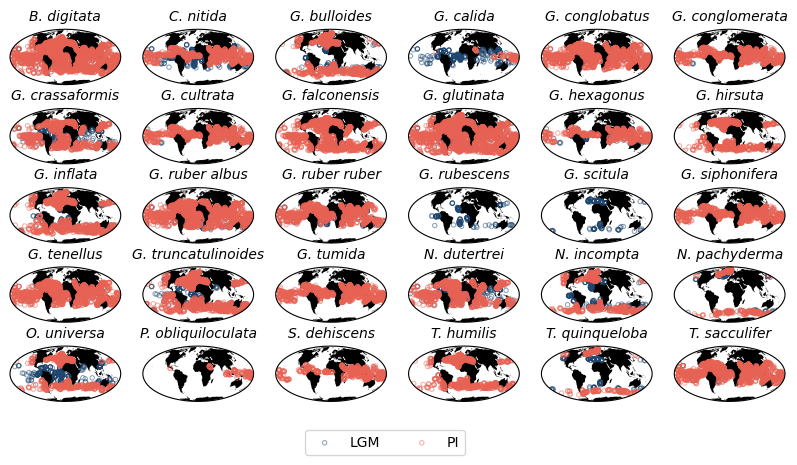

In [10]:
## write a function to filter species
def sp_opt_sub(df, species, age):
    ## select latitudes, longitudes and species columns
    df_sub = df[['Latitude','Longitude',species, "SST"]]
    
    ## get the optimal niche
    opt_niche = topt[topt.species==species]

    ## if LGM
    if age == "LGM":
        Topt_min = opt_niche.iloc[0,5]
        Topt_max = opt_niche.iloc[0,7]
    elif age == "PI":
        Topt_min = opt_niche.iloc[0,6]
        Topt_max = opt_niche.iloc[0,8]
        print(Topt_min, Topt_max)
    else:
        raise ValueError("age must be either lgm or pi")
    
    df_sub = df_sub[(df_sub.SST >= Topt_min) & (df_sub.SST <= Topt_max)]
        
    return df_sub

## write a function to plot optimal niche, just occurence
def plot_opt_niche(ax, df, species, age, **kwargs):
    ## select latitudes, longitudes and species columns
    df_sub = sp_opt_sub(df, species, age)
    ## plot
    ax.scatter(df_sub.Longitude, df_sub.Latitude,
               #s = df_sub[species],
               s=10,
               facecolors='none',
               transform=ccrs.PlateCarree(), **kwargs)
    return ax

## do this for multiple species
fig, axes = plt.subplots(nrows=6, ncols=6,
                         figsize=(10, 6),
                         subplot_kw=dict(projection=ccrs.Mollweide()))

from cartopy.feature import LAND
for i, ax in enumerate(axes.flat):
    ## add coastlines
    ax.set_global()
    ## add land mask
    ax.add_feature(LAND, facecolor="black")
    ax.set_title(species_list[i], style='italic', fontfamily='sans-serif', fontsize=10)

    plot_opt_niche(ax, lgm, species_list[i], age='LGM', label="LGM",
                   edgecolors="#1e466e", alpha=0.5,
                    linewidth=0.75)
    
    plot_opt_niche(ax, forcens, species_list[i], age='PI', label="PI",
                   edgecolors="#e86254",alpha=0.5,
                    linewidth=0.75)

    ## if exceed the number of species, break
    if i == len(species_list) - 1:
        break

## remove unused axes
for ax in axes.flat[i+1:]:
    ax.remove()

## legend
#fig.legend(["LGM", "PI"], loc="lower center", ncol=1, bbox_to_anchor=(0.58, 0.13))
fig.legend(["LGM", "PI"], loc="lower center", ncol=2, bbox_to_anchor=(0.5, 0.15))

## save the fig
fig.savefig("../output/ext_data_fig3.png", dpi=300, bbox_inches='tight')